In [12]:
import pandas as pd

data = pd.read_csv("./kinton_reviews.csv")

In [13]:
from textblob import TextBlob

# Assuming the reviews are in a column named 'review'
data['sentiment'] = data['review_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sentiment_label
negative    4.518519
positive    4.761644
Name: review_rating, dtype: float64


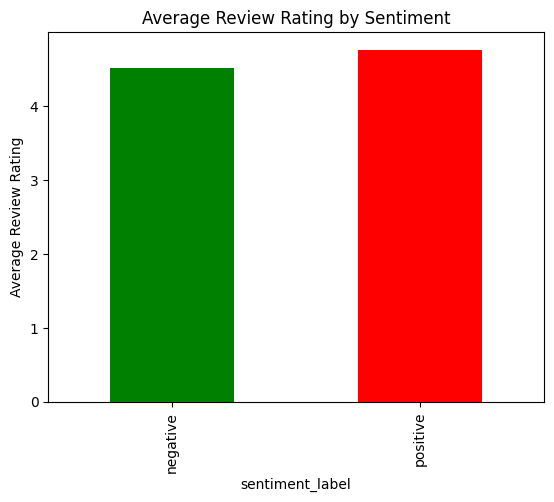

In [14]:
import matplotlib.pyplot as plt

# Create a new column for sentiment label
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Group by sentiment label and calculate average review_rating
avg_rating_by_sentiment = data.groupby('sentiment_label')['review_rating'].mean()

print(avg_rating_by_sentiment)

# Visualize the correlation
avg_rating_by_sentiment.plot(kind='bar', color=['green', 'red'])
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Sentiment')
plt.show()

In [15]:
num_with_review_text = data['review_text'].notnull().sum()
percentage_with_review_text = num_with_review_text / len(data) * 100

print(f"Rows with review_text: {num_with_review_text} ({percentage_with_review_text:.2f}%)")

Rows with review_text: 415 (83.00%)


In [22]:
import re

# Define a regex pattern for English words (a-z, A-Z)
english_word_pattern = re.compile(r'[a-zA-Z]+')

# Create a mask for reviews containing at least one English word
english_comment_mask = data['review_text'].apply(lambda x: bool(english_word_pattern.search(str(x))) if pd.notnull(x) else False)

english_count = english_comment_mask.sum()
non_english_count = (~english_comment_mask & data['review_text'].notnull()).sum()
english_percentage = english_count / num_with_review_text * 100
non_english_percentage = non_english_count / num_with_review_text * 100

print(f"English comments: {english_count} ({english_percentage:.2f}%)")
print(f"Non-English comments: {non_english_count} ({non_english_percentage:.2f}%)")

English comments: 405 (97.59%)
Non-English comments: 10 (2.41%)


In [25]:
# Display non-English comments
for idx, comment in non_english_comments.items():
    print(f"Original (index {idx}): {comment}\n")


Original (index 46): 제가 라면 만두 싹슬이 했슴니다 라맨집 여기가 최고예요!!!!

Original (index 58): 여름 이벤트가 좋은 거 같아요
음식 간은 잘 모르겠어요 제 입맛에는 국물이 조금 싱겁다고 생각했어요 교자는 괜찮았습니다 그래도 맛있어요
혼자 먹는 곳이 잘돼있고 서비스랑 인사가 아주 좋아요

Original (index 153): 我點一般豬肉拉麵，太好吃了

Original (index 218): 너무 맛있어요! 밴쿠버 라멘 중에서 제일 맛있어요!!
베지가 특히 맛있었어요

Original (index 274): 아주 맛있게 먹고 갑니당

Original (index 280): 무난하게 먹기 좋은 곳 같습니다..! 토핑이 다양하게 들어가있어서 좋았어요😄

Original (index 282): すごくおいしかったです。

Original (index 300): 깨끗하고 맛있고 친절해요

Original (index 459): 맛있었습니다!:)

Original (index 460): 한국인에게는 스파이시랑 기본포크가 맛있어요! 스파이시에는 마늘이 많이들어가요 기본 외에는 계란 제공이 안돼요

